In [1]:
import pandas as pd
from FeatureDataClass import IndustryData

# Fetch our primary Resume -> Industry dataset
ind = IndustryData().preprocess_data()

# Get raw counts
industry_counts = ind['Industry'].value_counts()
print("Raw counts:")
print(industry_counts)

# Get percentage distribution
industry_percentages = ind['Industry'].value_counts(normalize=True) * 100
print("\nPercentage distribution:")
print(industry_percentages.round(2))
ind

Raw counts:
Industry
Education                    410
Mechanical Engineer          384
Electrical Engineering       384
Consultant                   368
Civil Engineer               364
Sales                        364
Management                   361
Human Resources              360
Digital Media                358
Accountant                   350
Java Developer               348
Building and Construction    345
Operations Manager           345
Architecture                 344
Testing                      344
Business Analyst             340
Aviation                     340
Finance                      339
SQL Developer                338
Public Relations             337
Health and Fitness           332
Arts                         332
Network Security Engineer    330
DotNet Developer             329
Apparel                      320
Banking                      314
Automobile                   313
Web Designing                309
SAP Developer                304
Data Science          

,Industry,resume_text
0,Accountant,education omba executive leadership university...
1,Accountant,howard gerrard accountant deyjobcom birmingham...
2,Accountant,kevin frank senior accountant inforesumekraftc...
3,Accountant,place birth nationality olivia ogilvy accounta...
4,Accountant,stephen greet cpa senior accountant 9 year exp...
...,...,...
13384,Web Designing,jessica claire montgomery street san francisco...
13385,Web Designing,jessica claire montgomery street san francisco...
13386,Web Designing,summary jessica claire 100 montgomery st 10th ...
13387,Web Designing,jessica claire montgomery street san francisco...


It seems like there are a lot of IT related jobs which aren't labelled IT.

(Information Technology)
React Developer
Python Developer
DevOps
ETL Developer
Web Desiging
DotNet Developer
Network Security Engineer
SQL Developer
Java Developer

We could potentially group these into distinct classes, as it could be hard for the agent to pick up on these niche industry domains (which are moreso job titles as opposed to industries).


I'm proposing we perform the following splits

Under Information Technology, we will now include;
DevOps
SAP Developer
Database
SQL Developer
ETL Developer
Web Desiging

Creating a new class, Software Engineering, we will now include;
Java Developer
DotNet Developer
Network Security Engineer
React Developer
Python Developer

Creating a new class


In [2]:
from categorize_industries import categorize_industries
categorize_industries(industry_counts)

```python
'Engineering': ['Mechanical Engineer', 'Electrical Engineering', 'Civil Engineer', 'Architecture', 'Network Security Engineer', 'DevOps', 'Database', 'SAP Developer'],
'Consulting': ['Consultant', 'Business Analyst', 'Operations Manager', 'PMO'],
'Sales and Marketing': ['Sales', 'Public Relations', 'Digital Media'],
'Human Resources': ['Human Resources', 'Management'],
'Information Technology': ['Java Developer', 'SQL Developer', 'DotNet Developer', 'React Developer', 'Python Developer', 'ETL Developer', 'Data Science', 'Blockchain', 'Web Designing'],
'Aerospace': ['Aviation'],
'Finance': ['Finance', 'Banking', 'Accountant'],
'Construction': ['Building and Construction', 'Civil Engineer'],
'Health': ['Health and Fitness', 'Food and Beverages'],
'Legal': ['Advocate'],
'Creative Arts': ['Arts', 'Designing'],
'Automotive': ['Automobile'],
'Manufacturing': ['Apparel'],
'Telecommunications': [],
'Agriculture': ['Agriculture'],
'Business Process Outsourcing': ['BPO'],
'Testing': ['

In [3]:
from categorize_industries import update_industry

# Assuming your DataFrame 'ind' is already defined
# Call the function to update the 'Industry' column
ind = update_industry(ind)

# Check the updated distribution
print("Updated Industry Distribution:")
print(ind['Industry'].value_counts())

# Print the percentage distribution
print("\nPercentages:")
print(ind['Industry'].value_counts(normalize=True) * 100)

Updated Industry Distribution:


KeyError: 'Industry'

In [8]:
industries_to_sample = ['IT', 'Software Development', 'Engineering', 'Finance', 'Management', 
                        'Arts and Media', 'Consulting', 'Sales and Marketing']
sampled_rows = pd.DataFrame()

# Loop through each industry and sample 500 rows
for industry in industries_to_sample:
    sampled_rows = pd.concat([sampled_rows, ind[ind['Industry'] == industry].sample(n=500, random_state=42)])
# Get all rows that aren't IT or Software Engineering
other_rows = ind[~ind['Industry'].isin(industries_to_sample)]

# Combine all the dataframes
df_balanced = pd.concat([other_rows, sampled_rows])

# Shuffle the final dataframe
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new distribution
print("New Industry Distribution:")
print(df_balanced['Industry'].value_counts())
print("\nPercentages:")
print(df_balanced['Industry'].value_counts(normalize=True) * 100)

New Industry Distribution:
Industry
IT                        500
Consulting                500
Arts and Media            500
Management                500
Software Development      500
Engineering               500
Finance                   500
Sales and Marketing       500
Education                 410
HR                        360
Construction              345
Aviation                  340
Healthcare                332
Apparel                   320
Automotive                313
Data Science              299
Agriculture               293
Legal                     291
Information Technology    274
Customer Service          203
Food Services             162
Name: count, dtype: int64

Percentages:
Industry
IT                        6.295643
Consulting                6.295643
Arts and Media            6.295643
Management                6.295643
Software Development      6.295643
Engineering               6.295643
Finance                   6.295643
Sales and Marketing       6.295643
Educa

In [9]:
# Shuffle the rows so we don't have Industries clustered together
df_balanced = df_balanced.sample(frac=1, random_state=42) 
df_balanced

,Industry,resume_text
3286,Information Technology,jessica claire montgomery street san francisco...
3322,Legal,jessica claire resumesampleexamplecom 555 4321...
5004,Consulting,curriculum vitae adeline palmerston business a...
1420,Apparel,jessica claire 100 montgomery st 10th floor 55...
3785,Arts and Media,jessica claire montgomery street san francisco...
...,...,...
5226,Legal,professional summary jessica claire 100 montgo...
5390,Management,first last operations manager operations manag...
860,Finance,carla jensen experienced finance associate fak...
7603,Software Development,kristopher tillman 217 camryn extensions new y...


I'm also seeing duplicate entries, lets remove rows where there are duplicate resume_text data

In [10]:
# Now remove duplicates based on resume_text
df_balanced = df_balanced.drop_duplicates(subset=['resume_text']).sample(frac=1, random_state=42) 
df_balanced

# Check the new distribution
print("New Industry Distribution:")
print(df_balanced['Industry'].value_counts())
print("\nPercentages:")
print(df_balanced['Industry'].value_counts(normalize=True) * 100)

New Industry Distribution:
Industry
Finance                   489
Engineering               482
IT                        478
Sales and Marketing       477
Software Development      476
Management                475
Consulting                473
Arts and Media            467
Education                 389
Construction              334
Aviation                  327
Apparel                   315
HR                        304
Automotive                302
Healthcare                295
Legal                     281
Data Science              274
Information Technology    259
Agriculture               227
Customer Service          197
Food Services             144
Name: count, dtype: int64

Percentages:
Industry
Finance                   6.550569
Engineering               6.456798
IT                        6.403215
Sales and Marketing       6.389819
Software Development      6.376423
Management                6.363027
Consulting                6.336236
Arts and Media            6.255861
Educa

## Code to output the class distribution of our datasets

In [ ]:
# Read the CSV file
df = pd.read_csv('local_datasets/ResumeFeatures.csv')

# Get class distributions for 'Industry' and 'experience_level'
industry_distribution = df['industry'].value_counts()
experience_level_distribution = df['experience_level'].value_counts()

# Create summary tables
industry_summary = industry_distribution.reset_index()
industry_summary.columns = ['Industry', 'Count']
industry_summary['Percentage'] = (industry_summary['Count'] / industry_summary['Count'].sum()) * 100

experience_level_summary = experience_level_distribution.reset_index()
experience_level_summary.columns = ['Experience Level', 'Count']
experience_level_summary['Percentage'] = (experience_level_summary['Count'] / experience_level_summary['Count'].sum()) * 100

# Output the summaries
print("\nIndustry Distribution Summary:")
print(industry_summary)

print("\nExperience Level Distribution Summary:")
print(experience_level_summary)


Industry Distribution Summary:
                     Industry  Count  Percentage
0      Information Technology     12    8.000000
1                       Sales     10    6.666667
2               Digital Media      9    6.000000
3            Business Analyst      8    5.333333
4        Software Engineering      8    5.333333
5          Operations Manager      8    5.333333
6                  Consultant      6    4.000000
7                Architecture      5    3.333333
8                     Banking      5    3.333333
9              Civil Engineer      5    3.333333
10            Human Resources      5    3.333333
11                  Education      5    3.333333
12  Building and Construction      5    3.333333
13                    Testing      5    3.333333
14         Health and Fitness      4    2.666667
15                    Finance      4    2.666667
16                 Accountant      4    2.666667
17     Electrical Engineering      4    2.666667
18                   Aviation      4 

In [ ]:
df1 = pd.read_csv('local_datasets/ResumeFeatures_backup.csv')
ind = update_industry(df1)
ind.to_csv('local_datasets/Updated_ResumeFeatures.csv', index=False)
# Check the updated distribution
print("Updated Industry Distribution:")
print(ind['Industry'].value_counts())

# Print the percentage distribution
print("\nPercentages:")
print(ind['Industry'].value_counts(normalize=True) * 100)
ind

Updated Industry Distribution:


KeyError: 'ndustry'

In [13]:
# Read the CSV file
df = pd.read_csv('local_datasets/JobResumeMatches.csv')

# Get class distribution for 'label'
label_distribution = df['label'].value_counts()

# Create a summary table
label_summary = label_distribution.reset_index()
label_summary.columns = ['Label', 'Count']
label_summary['Percentage'] = (label_summary['Count'] / label_summary['Count'].sum()) * 100

# Output the summary
print("\nLabel Distribution Summary:")
print(label_summary)


Label Distribution Summary:
           Label  Count  Percentage
0       Good Fit     50   33.333333
1         No Fit     50   33.333333
2  Potential Fit     50   33.333333


In [14]:
# Read the CSV file
df = pd.read_csv('local_datasets/Resumes.csv')

# Get class distribution for 'label'
label_distribution = df['label'].value_counts()

# Create a summary table
label_summary = label_distribution.reset_index()
label_summary.columns = ['Label', 'Count']
label_summary['Percentage'] = (label_summary['Count'] / label_summary['Count'].sum()) * 100

# Output the summary
print("\nLabel Distribution Summary:")
print(label_summary)


Label Distribution Summary:
   Label  Count  Percentage
0      0     26   50.980392
1      1     25   49.019608


In [8]:
# df_save = df_balanced.sample(n=150, random_state=42)
# df_save['experience_level'] = None
# df_save.to_csv('local_datasets/ResumeFeatures1.csv')

In [15]:
resumes_df = ind[['resume_text']]
resumes_df = resumes_df.iloc[0:25]
resumes_df['label'] = 1
resumes_df = resumes_df.rename(columns={'resume_text': 'text'})
resumes_df.to_csv('local_datasets/Resumes.csv')

In [16]:
def get_resume_job_match_dataset(train_or_test="train"):
    """
    Returns pandas dataframe with three columns:
        1. resume_text: Has resume text
        2. job_description_text: Has job description text
        3. label: One of {No Fit, Good Fit, Potential Fit}, whether resume and job description are a fit
    """

    splits = {'train': 'train.csv', 'test': 'test.csv'}
    df = pd.read_csv("hf://datasets/cnamuangtoun/resume-job-description-fit/" + splits[train_or_test])

    return df
df = get_resume_job_match_dataset()

In [17]:
df['label'].unique()

array(['No Fit', 'Potential Fit', 'Good Fit'], dtype=object)

In [18]:
df_no_fit = df[df['label'] == 'No Fit'].sample(n=50, random_state=42)
df_potential_fit = df[df['label'] == 'Good Fit'].sample(n=50, random_state=42)
df_good_fit = df[df['label'] == 'Potential Fit'].sample(n=50, random_state=42)

sampled_df = pd.concat([df_no_fit, df_potential_fit, df_good_fit])
sampled_df = sampled_df.sample(frac=1, random_state=42).reset_index(drop=True)
sampled_df

,resume_text,job_description_text,label
0,SummaryEnergetic worker with a broad range of ...,"Reviews, analyzes, and evaluates business syst...",Good Fit
1,Professional Overview10+ years' research exper...,"Hello,Greetings from DevCare SolutionsI got an...",No Fit
2,ProfileHighly motivated Sales Associate with e...,Are you passionate about the clean tech automo...,Potential Fit
3,SummaryExperienced programmeradept at applicat...,Calling all innovators find your future at Fi...,Good Fit
4,Professional SummaryHighly motivated Sales Ass...,Industry leading client is seeking a Senior Ac...,Good Fit
...,...,...,...
145,Career OverviewA position to lead diverse team...,Job Description\nJob Title: Salesforce Communi...,Good Fit
146,ProfileActively seeking full time opportunitie...,"Were ALTEN Technology USA, an engineering comp...",Potential Fit
147,Experience10/2019to06/2019Data AnalystAngi Hom...,Requirement - Must have experience in FACETS....,No Fit
148,Professional SummaryMotivated Senior Software ...,"As a Manager, you will be a key driver in buil...",Good Fit


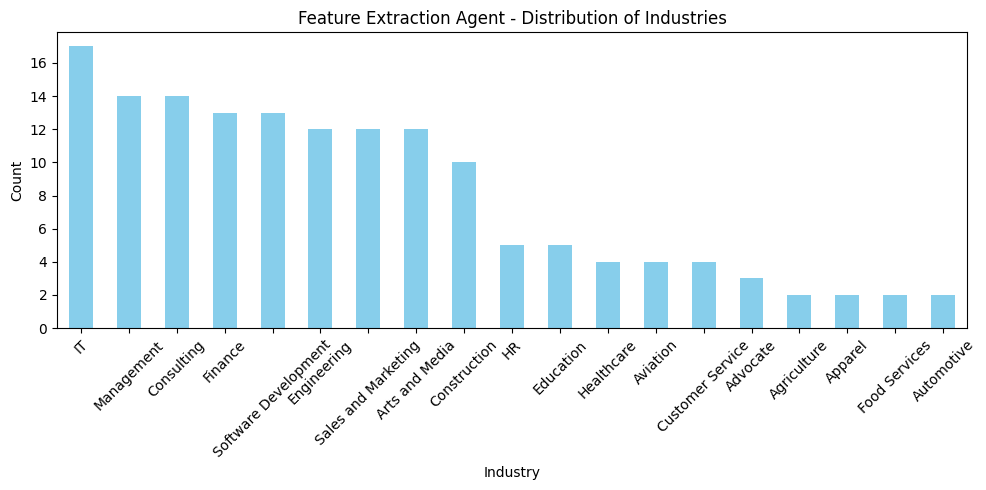

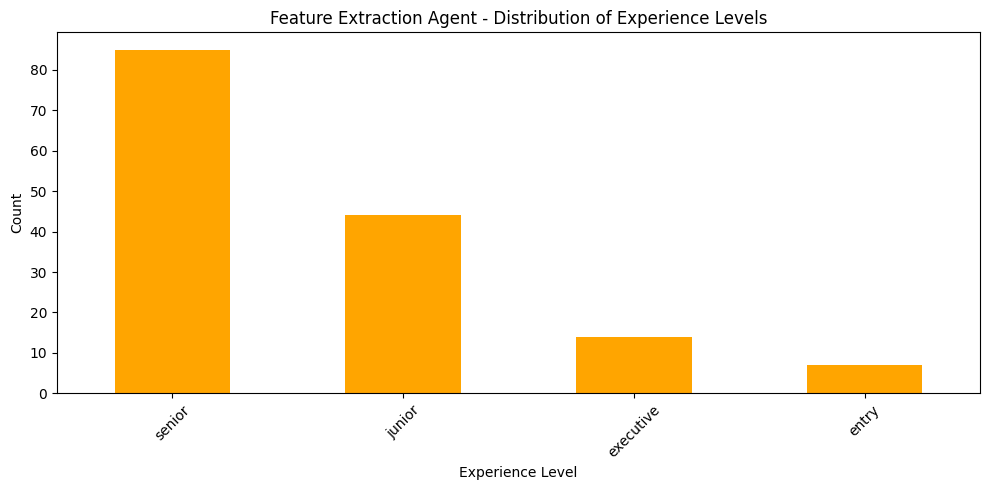

In [11]:
from data import UpdatedResumeFeaturesDateset, JobResumeMatchesDataset
import matplotlib.pyplot as plt
df = UpdatedResumeFeaturesDateset.df

# Plot distribution of unique values in "industry"
industry_counts = df['industry'].value_counts()
industry_counts.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Feature Extraction Agent - Distribution of Industries')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot distribution of unique values in "experience_level"
experience_counts = df['experience_level'].value_counts()
experience_counts.plot(kind='bar', figsize=(10, 5), color='orange')
plt.title('Feature Extraction Agent - Distribution of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
sampled_df.to_csv('local_datasets/JobResumeMatches.csv')

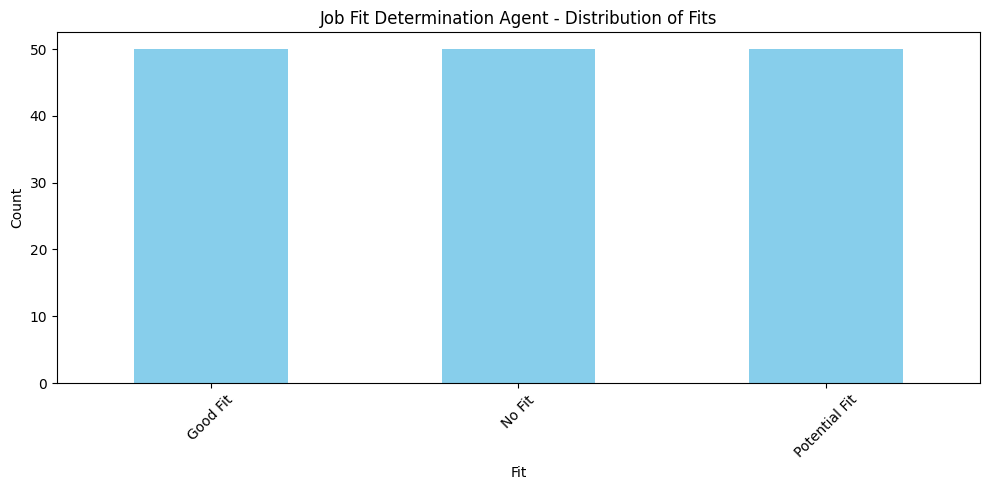

In [10]:
from data import UpdatedResumeFeaturesDateset, JobResumeMatchesDataset
import matplotlib.pyplot as plt
df = JobResumeMatchesDataset.df

# Plot distribution of unique values in "industry"
industry_counts = df['label'].value_counts()
industry_counts.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Job Fit Determination Agent - Distribution of Fits')
plt.xlabel('Fit')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

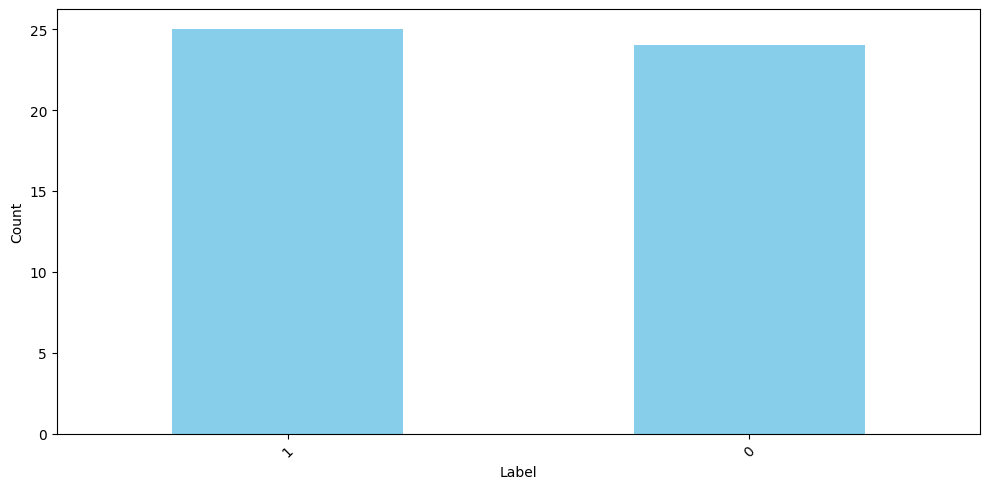

In [14]:
from data import UpdatedResumeFeaturesDateset, LocationValidationDataset
import matplotlib.pyplot as plt
df = LocationValidationDataset.df

# Plot distribution of unique values in "industry"
industry_counts = df['Label'].value_counts()
industry_counts.plot(kind='bar', figsize=(10, 5), color='skyblue')
# plt.title('Job Fit Determination Agent - Distribution of Fits')
# plt.xlabel('Fit')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()